# * Kurapati Venkatesh

# * 09012021

# * Topic: Multinominal Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## A University would like to effectively classify their student based on the Program they are enrolled into, perform multinomial regression on the given dataset and provide insights in the documentation.
### prog: is a categorical variable indicating what type of program a student is in: “General” (1), “Academic” (2), or “Vocational” (3)
### Ses: is a categorical variable indicating someone’s socioeconomic class: “Low” (1), “Middle” (2), and “High” (3)
### read, write, math, science are their scores on different tests
### honors: Whether they have enrolled or not




## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model to perform multinomial regression on the given data and classify the student based on the Program they are enrolled into.

## -------------------------------------------------------------------------------------------

## import libraries:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## import dataset:

In [5]:
progam = pd.read_csv(r"G:\360digit\assignments meterial\multinomial regression\mdata.csv")
progam.head(10)

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled
5,6,51,female,high,public,general,42,36,42,31,not enrolled
6,7,164,male,middle,public,vocation,31,36,46,39,not enrolled
7,8,133,male,middle,public,vocation,50,31,40,34,not enrolled
8,9,2,female,middle,public,vocation,39,41,33,42,not enrolled
9,10,53,male,middle,public,vocation,34,37,46,39,not enrolled


In [6]:
progam.drop(['Unnamed: 0','id']
           , axis=1, inplace = True)

In [7]:
progam.head()

,female,ses,schtyp,prog,read,write,math,science,honors
0,female,low,public,vocation,34,35,41,29,not enrolled
1,male,middle,public,general,34,33,41,36,not enrolled
2,male,high,public,vocation,39,39,44,26,not enrolled
3,male,low,public,vocation,37,37,42,33,not enrolled
4,male,middle,public,vocation,39,31,40,39,not enrolled


In [9]:
progam.describe(include="all")

,female,ses,schtyp,prog,read,write,math,science,honors
count,200,200,200,200,200.000000,200.000000,200.000000,200.000000,200
unique,2,3,2,3,NaN,NaN,NaN,NaN,2
top,female,middle,public,academic,NaN,NaN,NaN,NaN,not enrolled
freq,109,95,168,105,NaN,NaN,NaN,NaN,147
mean,NaN,NaN,NaN,NaN,52.230000,52.775000,52.645000,51.850000,NaN
std,NaN,NaN,NaN,NaN,10.252937,9.478586,9.368448,9.900891,NaN
min,NaN,NaN,NaN,NaN,28.000000,31.000000,33.000000,26.000000,NaN
25%,NaN,NaN,NaN,NaN,44.000000,45.750000,45.000000,44.000000,NaN
50%,NaN,NaN,NaN,NaN,50.000000,54.000000,52.000000,53.000000,NaN
75%,NaN,NaN,NaN,NaN,60.000000,60.000000,59.000000,58.000000,NaN


In [10]:
progam.prog.value_counts()

academic    105
vocation     50
general      45
Name: prog, dtype: int64

#### Boxplot of independent variable distribution for each category of choice: 

<AxesSubplot:xlabel='prog', ylabel='read'>

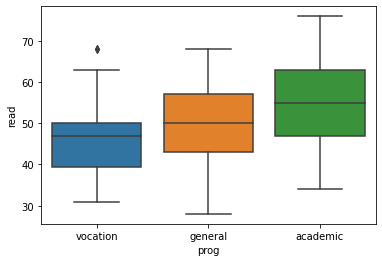

In [15]:
sns.boxplot(x = "prog", y = "read", data = progam)

<AxesSubplot:xlabel='prog', ylabel='write'>

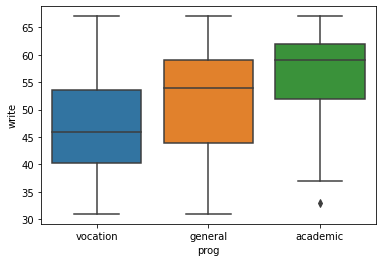

In [16]:
sns.boxplot(x = "prog", y = "write", data = progam)

<AxesSubplot:xlabel='prog', ylabel='math'>

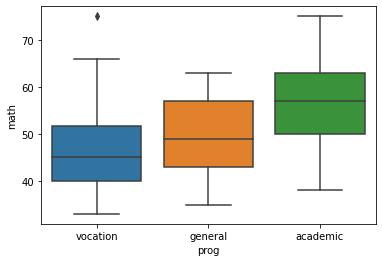

In [17]:
sns.boxplot(x = "prog", y = "math", data = progam)

<AxesSubplot:xlabel='prog', ylabel='science'>

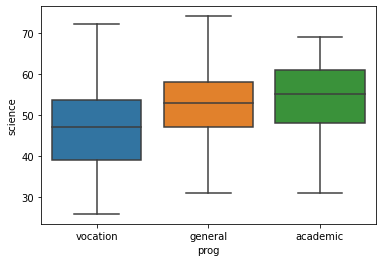

In [18]:
sns.boxplot(x = "prog", y = "science", data = progam)

In [11]:
progam.dtypes

female     object
ses        object
schtyp     object
prog       object
read        int64
write       int64
math        int64
science     int64
honors     object
dtype: object

#### Scatter plot for each categorical choice of car:

<AxesSubplot:xlabel='prog', ylabel='female'>

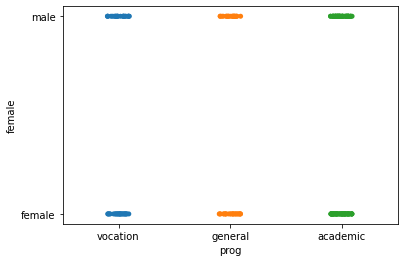

In [20]:
sns.stripplot(x = "prog", y = "female", jitter = True, data = progam)

<AxesSubplot:xlabel='prog', ylabel='ses'>

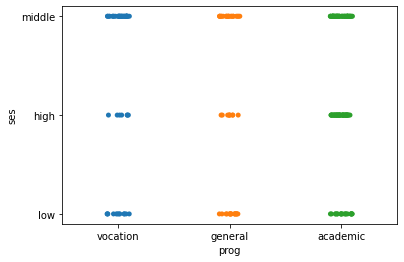

In [21]:
sns.stripplot(x = "prog", y = "ses", jitter = True, data = progam)

<AxesSubplot:xlabel='prog', ylabel='schtyp'>

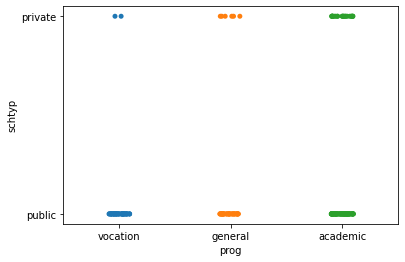

In [22]:
sns.stripplot(x = "prog", y = "schtyp", jitter = True, data = progam)

<AxesSubplot:xlabel='prog', ylabel='honors'>

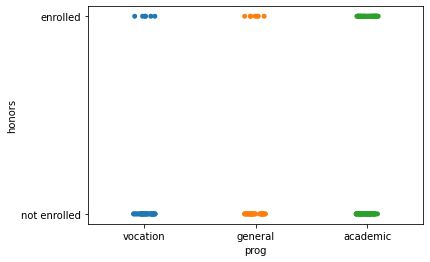

In [23]:
sns.stripplot(x = "prog", y = "honors", jitter = True, data = progam)

#### Scatter plot between each possible pair of independent variable and also histogram for each independent variable:

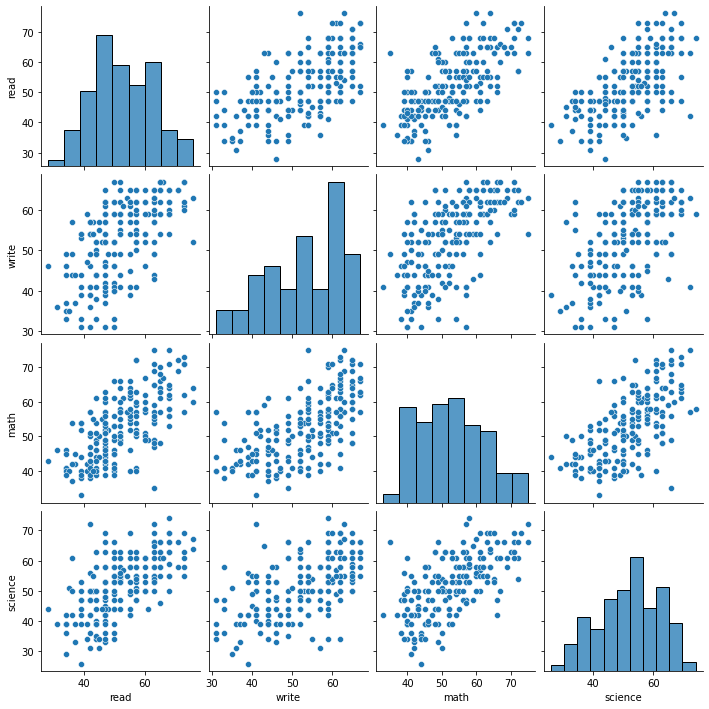

In [24]:
sns.pairplot(progam) # Normal

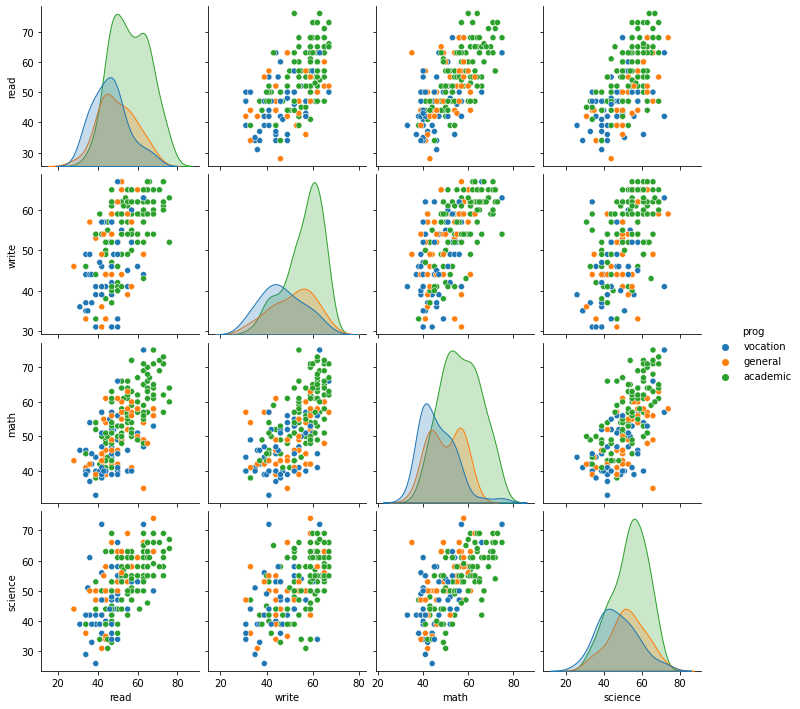

In [25]:
sns.pairplot(progam, hue = "prog")

##### Correlation values between each independent features:

In [26]:
progam.corr()

,read,write,math,science
read,1.000000,0.596776,0.662280,0.630158
write,0.596776,1.000000,0.617449,0.570442
math,0.662280,0.617449,1.000000,0.630733
science,0.630158,0.570442,0.630733,1.000000


In [29]:
#Reorder the prog column of dataframe
df=progam.reindex(columns= ['prog', 'female', 'ses','schtyp', 'read', 'write', 'math', 'science', 'honors'])
df.head()

,prog,female,ses,schtyp,read,write,math,science,honors
0,vocation,female,low,public,34,35,41,29,not enrolled
1,general,male,middle,public,34,33,41,36,not enrolled
2,vocation,male,high,public,39,39,44,26,not enrolled
3,vocation,male,low,public,37,37,42,33,not enrolled
4,vocation,male,middle,public,39,31,40,39,not enrolled


#### Transformation:

Before training the data, we would first transform the data to account for any skewness in the variable distribution. Various transformation techniques ranging from log transform to power transformation are available. For our analysis, we'll be using Box-cox transformation. It is used to modify the distributional shape of a set of data to be more normally distributed so that tests and confidence limits that require normality can be appropriately used.

In [32]:
from scipy.stats import boxcox
numerical = df.columns[df.dtypes == 'float64']
for i in numerical:
    if df[i].min() > 0:
        transformed, lamb = boxcox(df.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df.loc[df[i].notnull(), i] = transformed

##### One Hot Encoding:

Since we have some categorical variables for the analysis and the machne learning algorithms doesn't take categorical and string variables directly, we have to creat dummy variables for them. We can either encode them using label encoder available for python, but it would be wrong in our analysis since a lot of these variables have multiple categories. Just using weights can cause discrepencies in the algorithm. Instead, we will one hot encode these so that we have a 1 wherever that category turns up and 0 otherwise. This will also create seperate columns for each level of category. Also, we'll be dropping one of the categories so that we have N-1 columns instead of N.

In [33]:
dfno=df.drop('prog',axis=1)

In [34]:
dfdummies = pd.get_dummies(dfno, drop_first=True)

In [35]:
dfpr = df['prog']
dfpr.head()

0    vocation
1     general
2    vocation
3    vocation
4    vocation
Name: prog, dtype: object

In [36]:
dfprogram = pd.concat([dfpr, dfdummies], axis=1)
dfprogram.head()

,prog,read,write,math,science,female_male,ses_low,ses_middle,schtyp_public,honors_not enrolled
0,vocation,34,35,41,29,0,1,0,1,1
1,general,34,33,41,36,1,0,1,1,1
2,vocation,39,39,44,26,1,0,0,1,1
3,vocation,37,37,42,33,1,1,0,1,1
4,vocation,39,31,40,39,1,0,1,1,1


### Model:

In [37]:
train, test = train_test_split(dfprogram, test_size = 0.2)

In [39]:
# ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg").fit(train.iloc[:, 1:], train.iloc[:, 0])
model

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [42]:
test_predict = model.predict(test.iloc[:, 1:]) # Test predictions
test_predict

array(['academic', 'vocation', 'vocation', 'academic', 'academic',
       'general', 'general', 'vocation', 'vocation', 'academic',
       'vocation', 'academic', 'academic', 'vocation', 'academic',
       'vocation', 'academic', 'academic', 'academic', 'vocation',
       'vocation', 'vocation', 'academic', 'general', 'academic',
       'general', 'academic', 'academic', 'academic', 'vocation',
       'academic', 'academic', 'academic', 'academic', 'vocation',
       'academic', 'academic', 'vocation', 'general', 'academic'],
      dtype=object)

In [43]:
# Test accuracy 
accuracy_score(test.iloc[:,0], test_predict)

0.7

In [45]:
train_predict = model.predict(train.iloc[:, 1:]) # Train predictions 
train_predict

array(['vocation', 'academic', 'academic', 'general', 'academic',
       'academic', 'academic', 'academic', 'academic', 'academic',
       'academic', 'academic', 'vocation', 'academic', 'academic',
       'vocation', 'academic', 'academic', 'general', 'academic',
       'academic', 'academic', 'academic', 'academic', 'general',
       'academic', 'academic', 'academic', 'academic', 'academic',
       'academic', 'academic', 'vocation', 'academic', 'academic',
       'academic', 'academic', 'vocation', 'academic', 'general',
       'vocation', 'general', 'academic', 'academic', 'general',
       'academic', 'vocation', 'academic', 'academic', 'vocation',
       'general', 'vocation', 'academic', 'vocation', 'academic',
       'academic', 'vocation', 'vocation', 'vocation', 'academic',
       'academic', 'academic', 'academic', 'academic', 'general',
       'general', 'academic', 'academic', 'academic', 'academic',
       'general', 'general', 'vocation', 'vocation', 'academic',
      

In [46]:
# Train accuracy 
accuracy_score(train.iloc[:,0], train_predict) 

0.61875

This model is a good fit.